Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [5]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [6]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [110]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

1.0


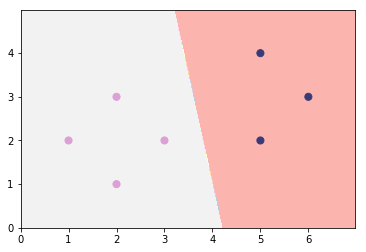

In [30]:
# Vaš kôd ovdje...
model = RidgeClassifier(alpha=0)
model.fit(seven_X, seven_y)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=model.predict)
acc_score = accuracy_score(seven_y, model.predict(seven_X))
print(acc_score)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

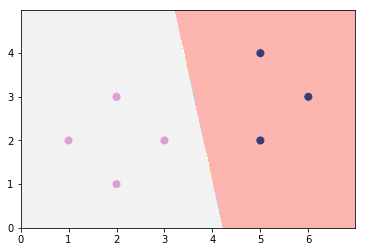

In [15]:
# Vaš kôd ovdje...
model2 = LinearRegression()
model2.fit(seven_X, seven_y)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : model2.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [14]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.875


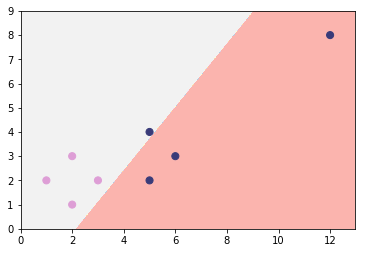

In [31]:
# Vaš kôd ovdje...
model3 = RidgeClassifier(alpha=0)
model3.fit(outlier_X, outlier_y)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=model3.predict)

acc_score3 = accuracy_score(outlier_y, model3.predict(outlier_X))
print(acc_score3)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [18]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.875


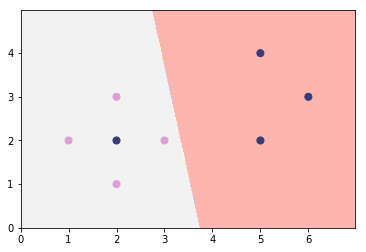

In [32]:
# Vaš kôd ovdje...
model4 = RidgeClassifier(alpha=0)
model4.fit(unsep_X, unsep_y)
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h=model4.predict)


acc_score4 = accuracy_score(unsep_y, model4.predict(unsep_X))
print(acc_score4)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

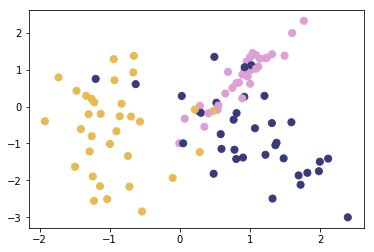

In [23]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje...
mc_X, mc_y = make_classification(n_classes=3, n_redundant=0, n_clusters_per_class=1, n_features=2)
mlutils.plot_2d_clf_problem(mc_X, mc_y, h=None)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

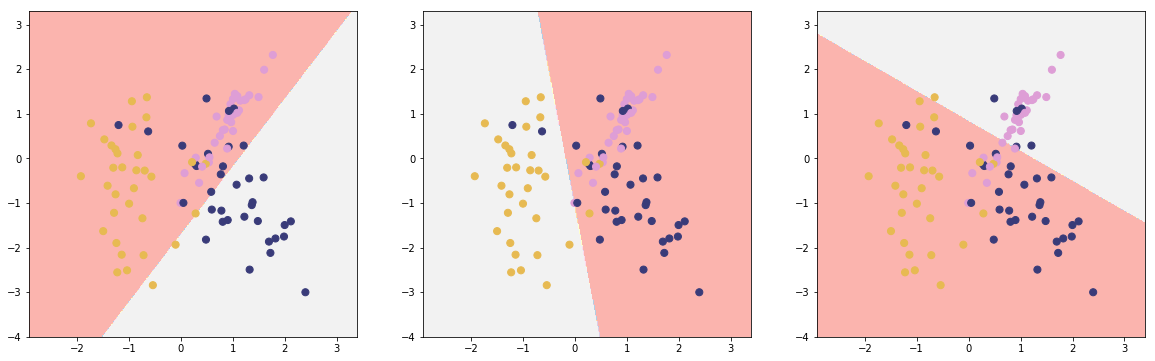

In [93]:
modelh = []
plt.figure(figsize=(20,6))
for i in range(0,3):
    ovr_y = [1 if y == i else -1 for y in mc_y]
    modelh.append(LinearRegression())
    modelh[i].fit(mc_X, ovr_y)
    plt.subplot(131+i)
    mlutils.plot_2d_clf_problem(mc_X, mc_y, h=lambda x : modelh[i].predict(x) >= 0)



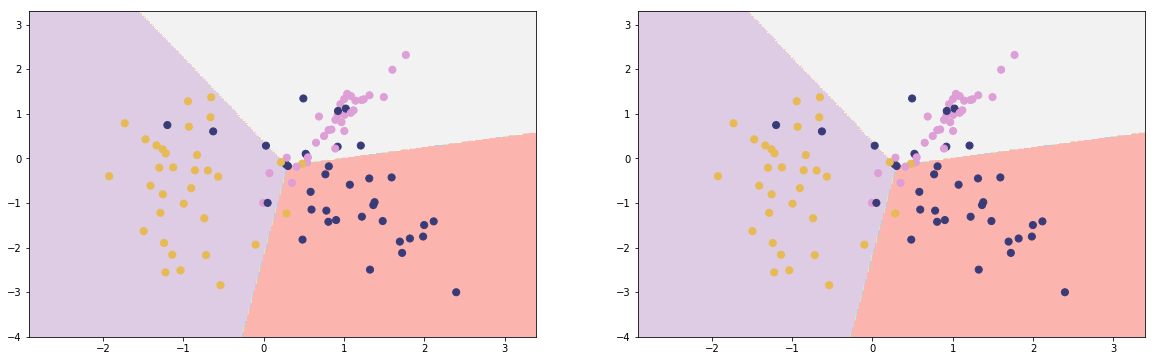

In [97]:
plt.figure(figsize=(20,6))
maxh = lambda x: argmax([y.predict(x) for y in modelh], axis=0)
plt.subplot(121)
mlutils.plot_2d_clf_problem(mc_X, mc_y, h=maxh)

modelrh = RidgeClassifier(alpha=0)
modelrh.fit(mc_X, mc_y)

plt.subplot(122)
mlutils.plot_2d_clf_problem(mc_X, mc_y, h=modelrh.predict)


### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

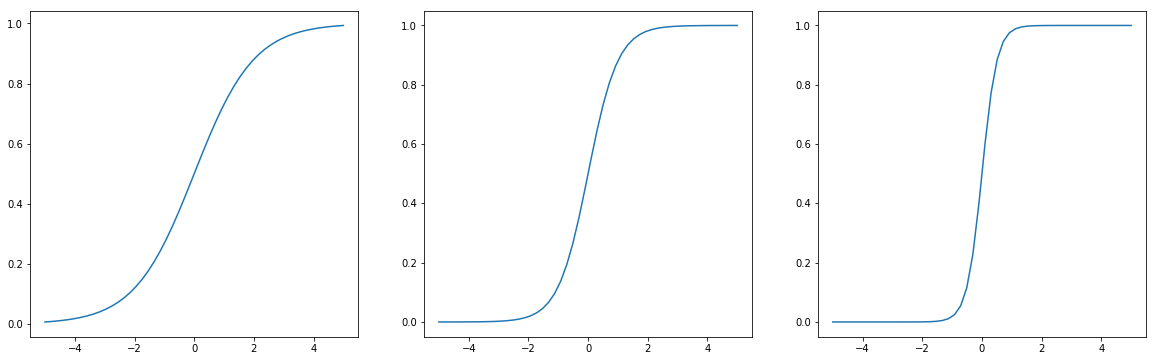

In [119]:
# Vaš kôd ovdje...
sigm = lambda x: 1/(1+exp(-x))
sigm_x = linspace(-5, 5)

plt.figure(figsize=(20,6))
for i, alpha in enumerate([1, 2, 4]):
    plt.subplot(131+i)
    plt.plot(sigm_x, sigm(sigm_x * alpha))

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [420]:
from sklearn.preprocessing import PolynomialFeatures

# Vaš kôd ovdje...
def lr_h(x, w):
    phi = PolynomialFeatures(1).fit_transform(x.reshape(1, -1))
    return sigm(phi.dot(w))

def cross_entropy_loss(y, h):
    return -y * log(h) - (1-y) * log(1 - h)

def cross_entropy_error(X, y, w, alpha=0):
    phi = PolynomialFeatures(1).fit_transform(X)
    h = sigm(phi.dot(w))
    N = len(X)
    err = sum(cross_entropy_loss(y, h)) + alpha/2 * w.T.dot(w)
    return err

In [421]:

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    n = X.shape[1]
    N = len(X)
    w = zeros(n+1)
    
    w_steps = array(w)
    last_err = float("inf")
    
    for it in range(0, max_iter):
        dw = zeros(n)
        dw_0 = 0
        
        for i in range(0, N):
            h = lr_h(X[i], w)
            dw += (h - y[i]) * X[i]
            dw_0 += h - y[i]
            
        w[0] -= eta * dw_0
        w[1:] = w[1:] * (1 - eta * alpha) - eta * dw
        
        w_steps = np.vstack([w_steps, w])
        new_err = cross_entropy_error(X, y, w, alpha)
        if abs(last_err - new_err) < epsilon:
            break
        
        last_err = new_err
    
    if trace:
        return w, w_steps[1:,]
    else:
        return w

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

E(w|D) = 0.542620277674


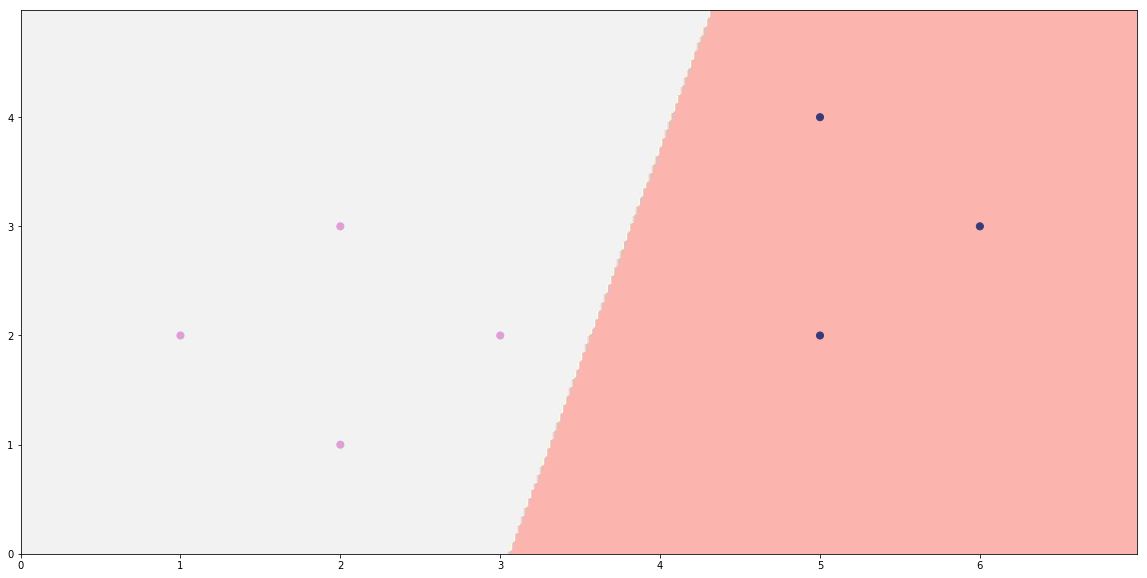

In [422]:
# Vaš kôd ovdje...

seven_w = lr_train(seven_X, seven_y)
seven_h = lambda x: lr_h(x, seven_w) > 0.5

seven_err = cross_entropy_error(seven_X, seven_y, seven_w)
print("E(w|D) =", seven_err)

mlutils.plot_2d_clf_problem(seven_X, seven_y, h=seven_h)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [423]:
def zero_loss_error(X, y, w):
    phi = PolynomialFeatures(1).fit_transform(X)
    h = array([0 if x > 0.5 else 1 for x in sigm(phi.dot(w))])
    err = sum(h.dot(y))
    return err

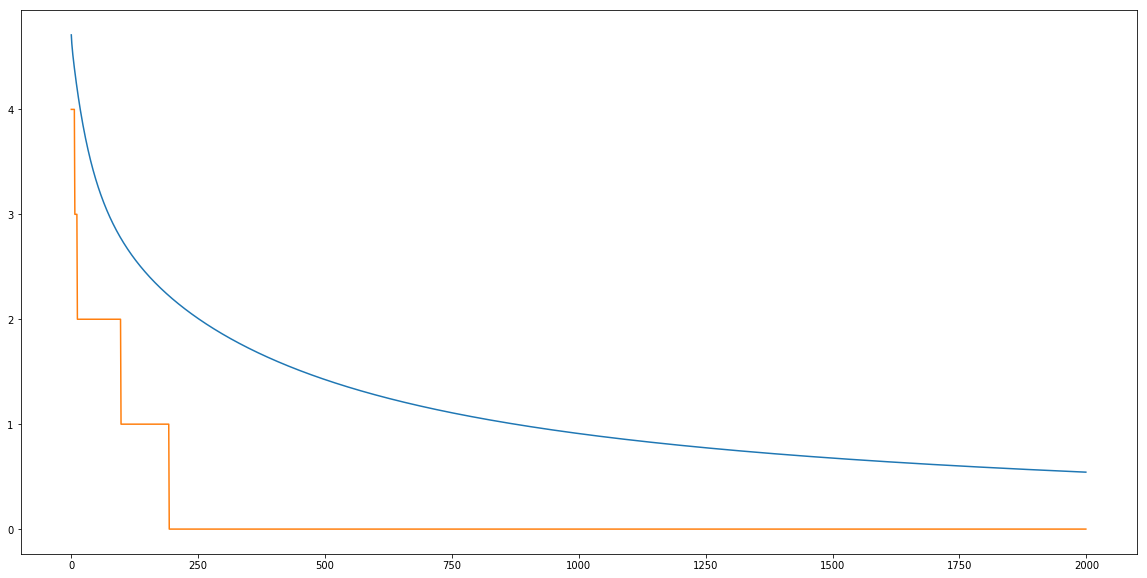

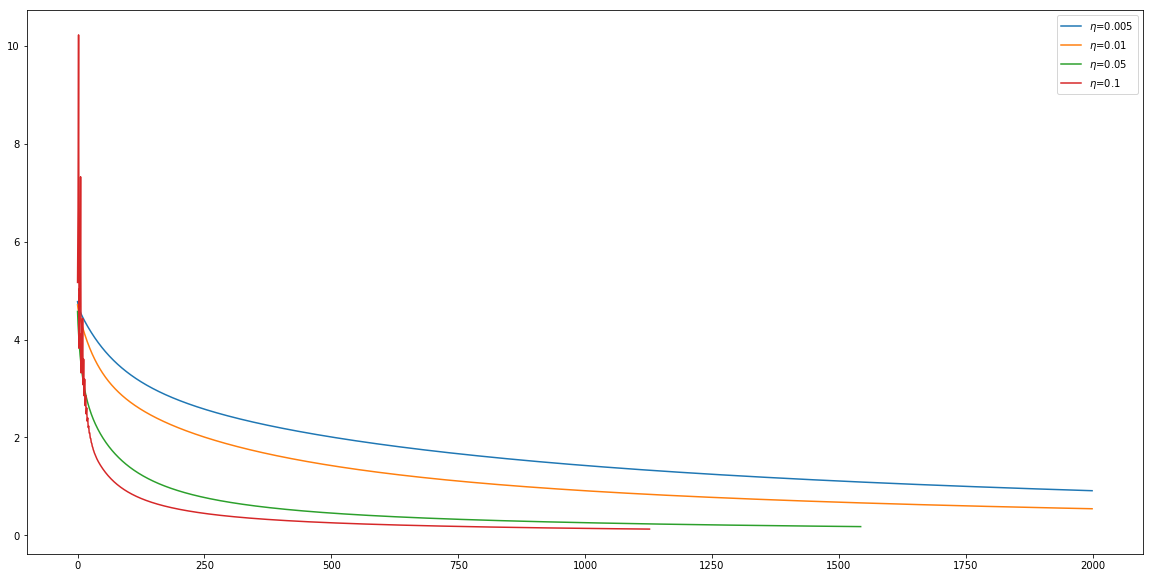

In [424]:
# Vaš kôd ovdje...

seven2_w, seven2_w_trace = lr_train(seven_X, seven_y, trace=True)

seven2_err_trace = [cross_entropy_error(seven_X, seven_y, w) for w in seven2_w_trace]
seven2_zle_trace = [zero_loss_error(seven_X, seven_y, w) for w in seven2_w_trace]

plt.figure(figsize=(20,10))
plt.plot(seven2_err_trace)
plt.plot(seven2_zle_trace)

etas = [0.005, 0.01, 0.05, 0.1]

plt.figure(figsize=(20,10))
for eta in etas:
    seven3_w, seven3_w_trace = lr_train(seven_X, seven_y, trace=True, eta=eta)
    seven3_err_trace = [cross_entropy_error(seven_X, seven_y, w) for w in seven3_w_trace]
    plt.plot(seven3_err_trace, label=r'$\eta$=%s' % eta)
plt.legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

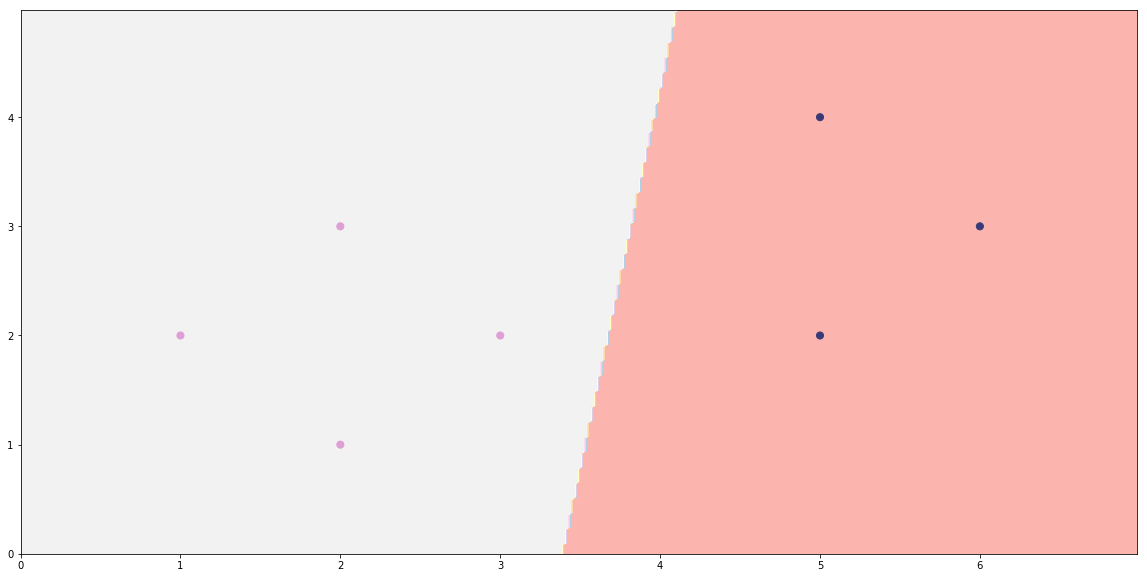

In [425]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje...
seven_lr_model = LogisticRegression(C=100, max_iter=2000, tol=0.0001)
seven_lr_model.fit(seven_X, seven_y)

mlutils.plot_2d_clf_problem(seven_X, seven_y, h=seven_lr_model.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

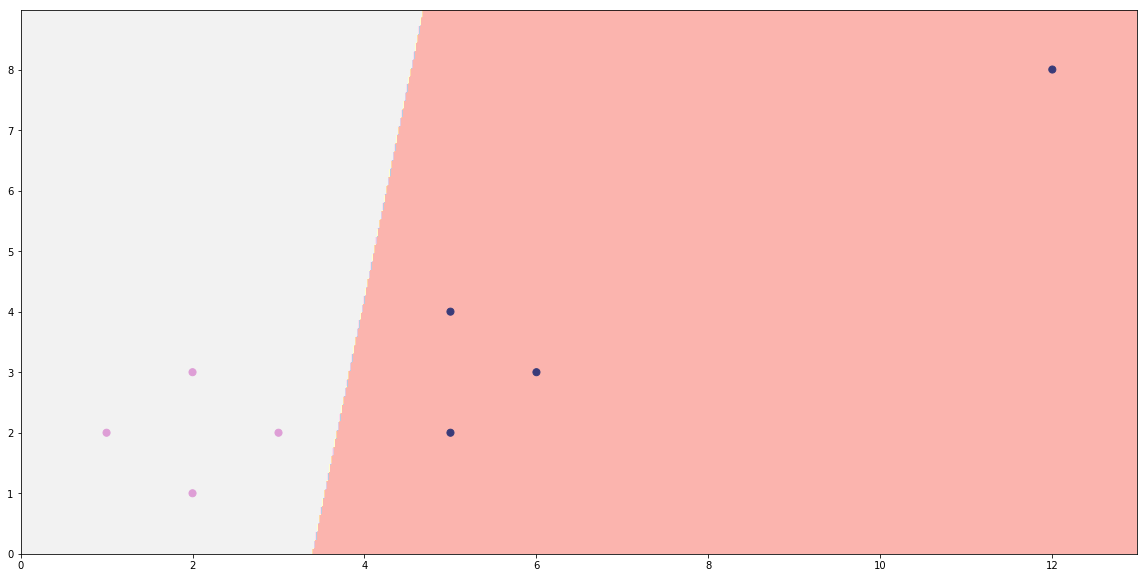

In [426]:
# Vaš kôd ovdje...
outlier_lr_model = LogisticRegression(C=100, max_iter=2000, tol=0.0001)
outlier_lr_model.fit(outlier_X, outlier_y)

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=outlier_lr_model.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


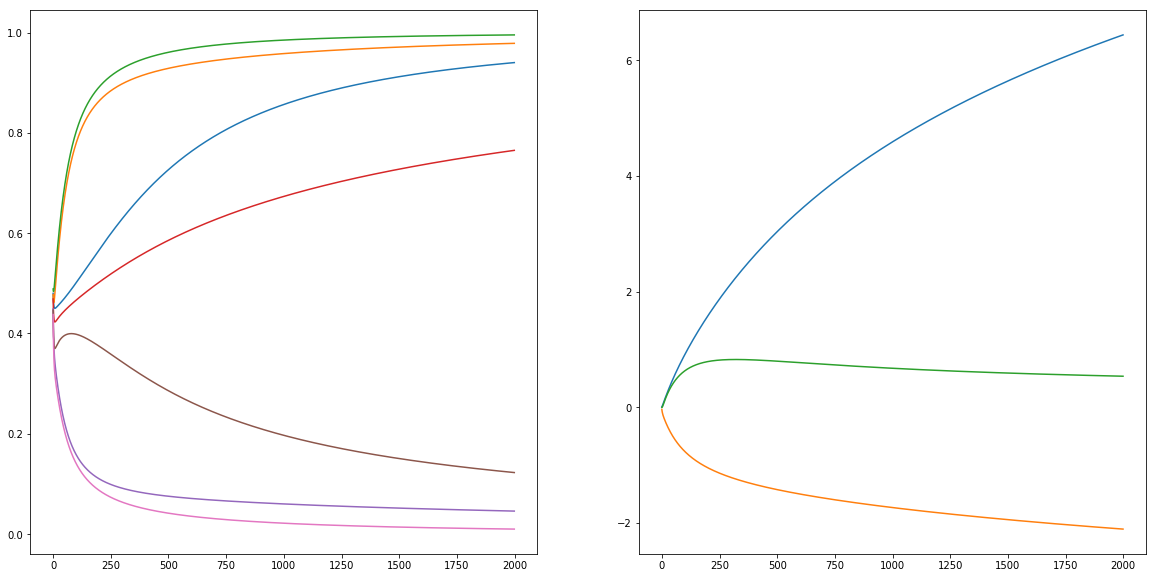

In [427]:
# Vaš kôd ovdje...
seven3_w, seven3_w_trace = lr_train(seven_X, seven_y, trace=True)

plt.figure(figsize(20,10))
plt.subplot(121)
for x in seven_X:
    h = [lr_h(x, w_k) for w_k in seven3_w_trace]
    plt.plot(h)
plt.subplot(122)
for i in range(0, seven3_w_trace.shape[1]):
    plt.plot(seven3_w_trace[:,i])

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

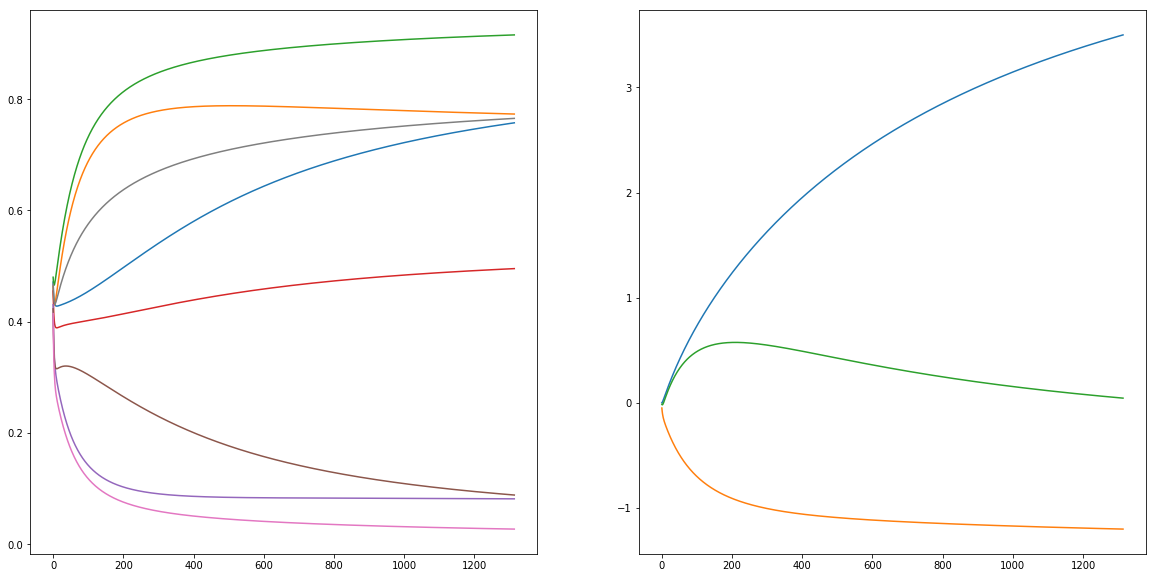

In [428]:
# Vaš kôd ovdje...
unsep_w, unsep_w_trace = lr_train(unsep_X, unsep_y, trace=True)

plt.figure(figsize(20,10))
plt.subplot(121)
for x in unsep_X:
    h = [lr_h(x, w_k) for w_k in unsep_w_trace]
    plt.plot(h)
plt.subplot(122)
for i in range(0, unsep_w_trace.shape[1]):
    plt.plot(unsep_w_trace[:,i])

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [429]:
from numpy.linalg import norm

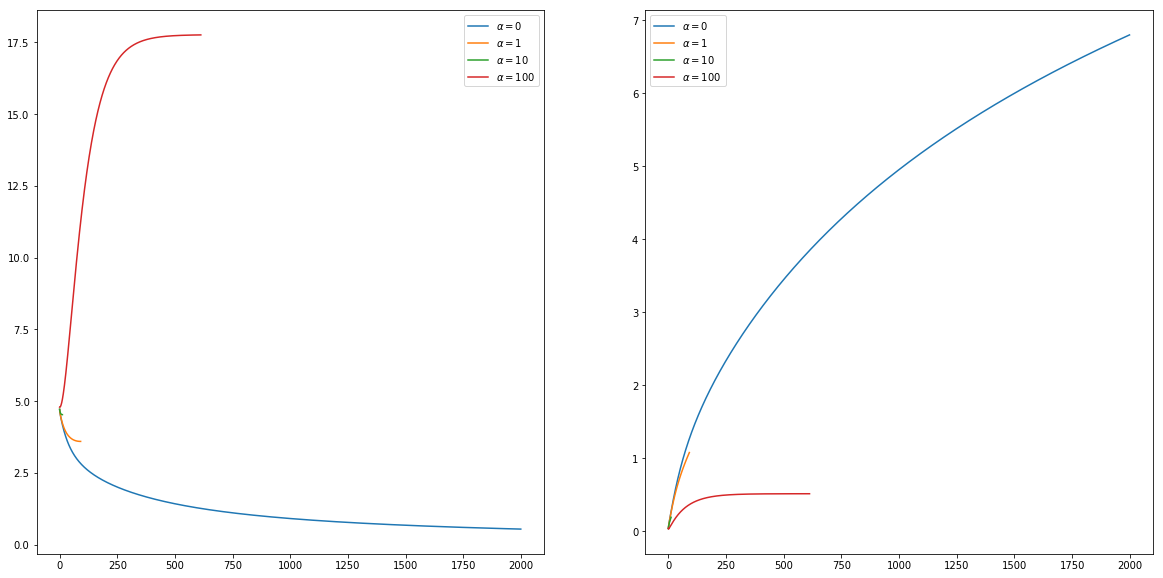

In [430]:
# Vaš kôd ovdje...

alphas = [0, 1, 10, 100]

plt.figure(figsize=(20,10))

for alpha in alphas:
    seven4_w, seven4_w_trace = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    seven4_err_trace = [cross_entropy_error(seven_X, seven_y, w, alpha) for w in seven4_w_trace]
    plt.subplot(121)
    plt.plot(seven4_err_trace, label=r'$\alpha=$%s' % alpha)
    
    plt.subplot(122)
    plt.plot([norm(w) for w in seven4_w_trace], label=r'$\alpha=$%s' % alpha)
    
plt.subplot(121)
plt.legend()
plt.subplot(122)
plt.legend()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

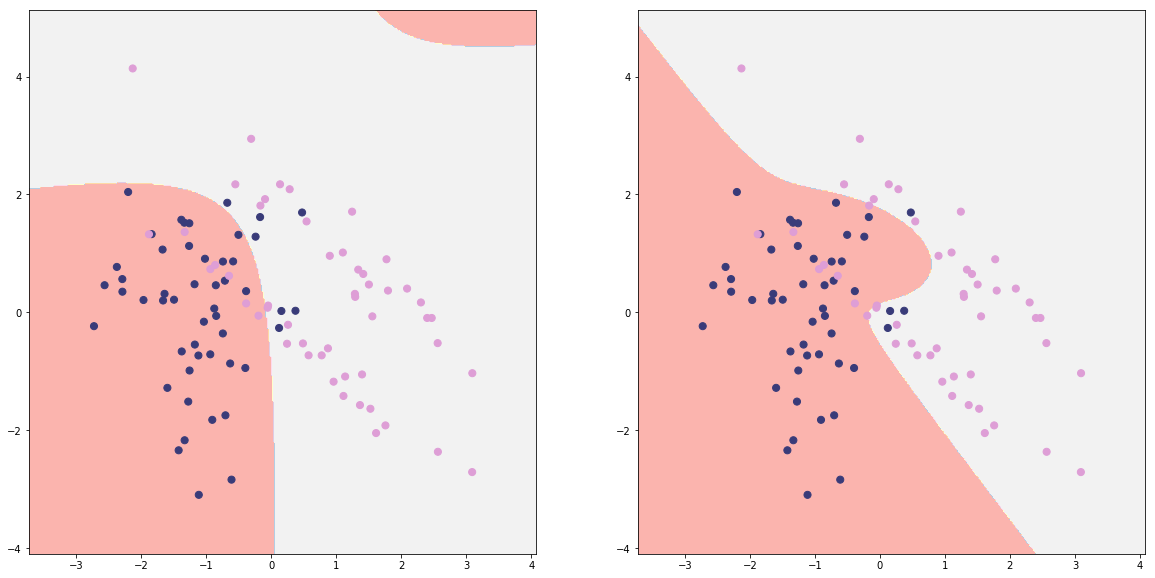

In [444]:
# Vaš kôd ovdje...
six_X, six_y = make_classification(n_samples=100, n_classes=2, n_redundant=0, n_clusters_per_class=2, n_features=2)

poly_2 = PolynomialFeatures(2)
six2_phi = poly_2.fit_transform(six_X)
poly_3 = PolynomialFeatures(3)
six3_phi = poly_3.fit_transform(six_X)

six2_model = LogisticRegression(C=100, max_iter=2000, tol=0.0001)
six2_model.fit(six2_phi, six_y)
six3_model = LogisticRegression(C=100, max_iter=2000, tol=0.0001)
six3_model.fit(six3_phi, six_y)

plt.figure(figsize=(20,10))
plt.subplot(121)
mlutils.plot_2d_clf_problem(six_X, six_y, lambda x : six2_model.predict(poly_2.transform(x)))
plt.subplot(122)
mlutils.plot_2d_clf_problem(six_X, six_y, lambda x : six3_model.predict(poly_3.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?